# Lesson 3 CSCI 3022


Practice with Exploratory Data Analysis 


# Exploratory Data Analysis

<br/><br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />


# Key Considerations in Exploratory Data Analysis:

- 1).   Structure -- what is the “shape” of a data file?

- 2). Granularity -- what type of data does each record represent? how fine/coarse is each record in your data?

- 3). Scope -- does the data cover the target population?

- 4). Temporality -- how is the data situated in time?

- 5).  Faithfulness -- how well does the data capture “reality”


## Dataset: United States Presidential Election Data
For our first analysis we will analyze some data from US Presidential elections.  This data is already stored in `data/elections.csv`

In [4]:
import pandas as pd

In [6]:
elections = pd.read_csv("data/elections.csv")

***
## EDA - 1).  What is the Structure of the Data?

We refer to a dataset’s **structure** as a mental representation of the data, and in particular, we represent data that have a tabular structure by arranging values in rows and columns. 

**Guiding Questions When Examining Data Structure**
     
   - What is the size of the data?
   - What type of file is it? (Do we trust this file extension?)
   - Are the data organized in records or nested?
   - Can we define records by parsing the data?
   - Can we reasonably un-nest the data?
   - Does the data reference other data?
   - Can we join/merge the data? (Do we need to)?
   - What are the fields in each record?
    - How are they encoded?  (e.g., strings, numbers, binary, dates …)
     - Datatype/Storage type: How each variable value is stored in memory. 
        - integer, floating point, boolean, object (string-like), etc.
        - Affects which pandas functions you use.
     - Variable type/Feature type of the data for our purposes:
        - Conceptualized measurement of information (and therefore what values it can take on).
            - Use expert knowledge; Explore data itself; Consult data codebook (if it exists).

     


## Determine what each variable in your dataset represents:

Ideally columns in the dataset are  named in a way that clearly explains that they represent.  If not, you will want to refer to the data's codebook (if one exists).

For this particular dataset the columns represent the following:



|Column|Description|
| --- | --- |
|Year| Year of the election | 
|Candidate| Candidate who ran| 
|Party | Party of candidate|
|Popular vote | Number of popular votes candidate received |
|Result | Whether the candidate won or lost the election |
|% | The percentage of popular votes the candidate received|



### Datatype/Storage Types
It's important to check if the variable type corresponds to how you would interpret the data.  Sometimes quantitative data is loaded as a string (and needs to be converted) or sometimes data that appears quantitative (1, 2, 3) is actually a code to represent a qualitative feature.  We will dive more deeply into how we conceptualize variable types when we discuss visualizing data in the next lesson.

A quick way to view the datatypes of all your columns is the 

`.info()` method which outputs the column integer positions, column labels, data types, memory usage, and the number of non-null cells in each column 


In [ ]:
# Practice:  Call the .info() method on the elections dataframe
...

You can also use
`df[colname].dtype`

The `object` datatype in python indicates string or mixed data.  


### Variable/Feature Types for visualizing/modeling

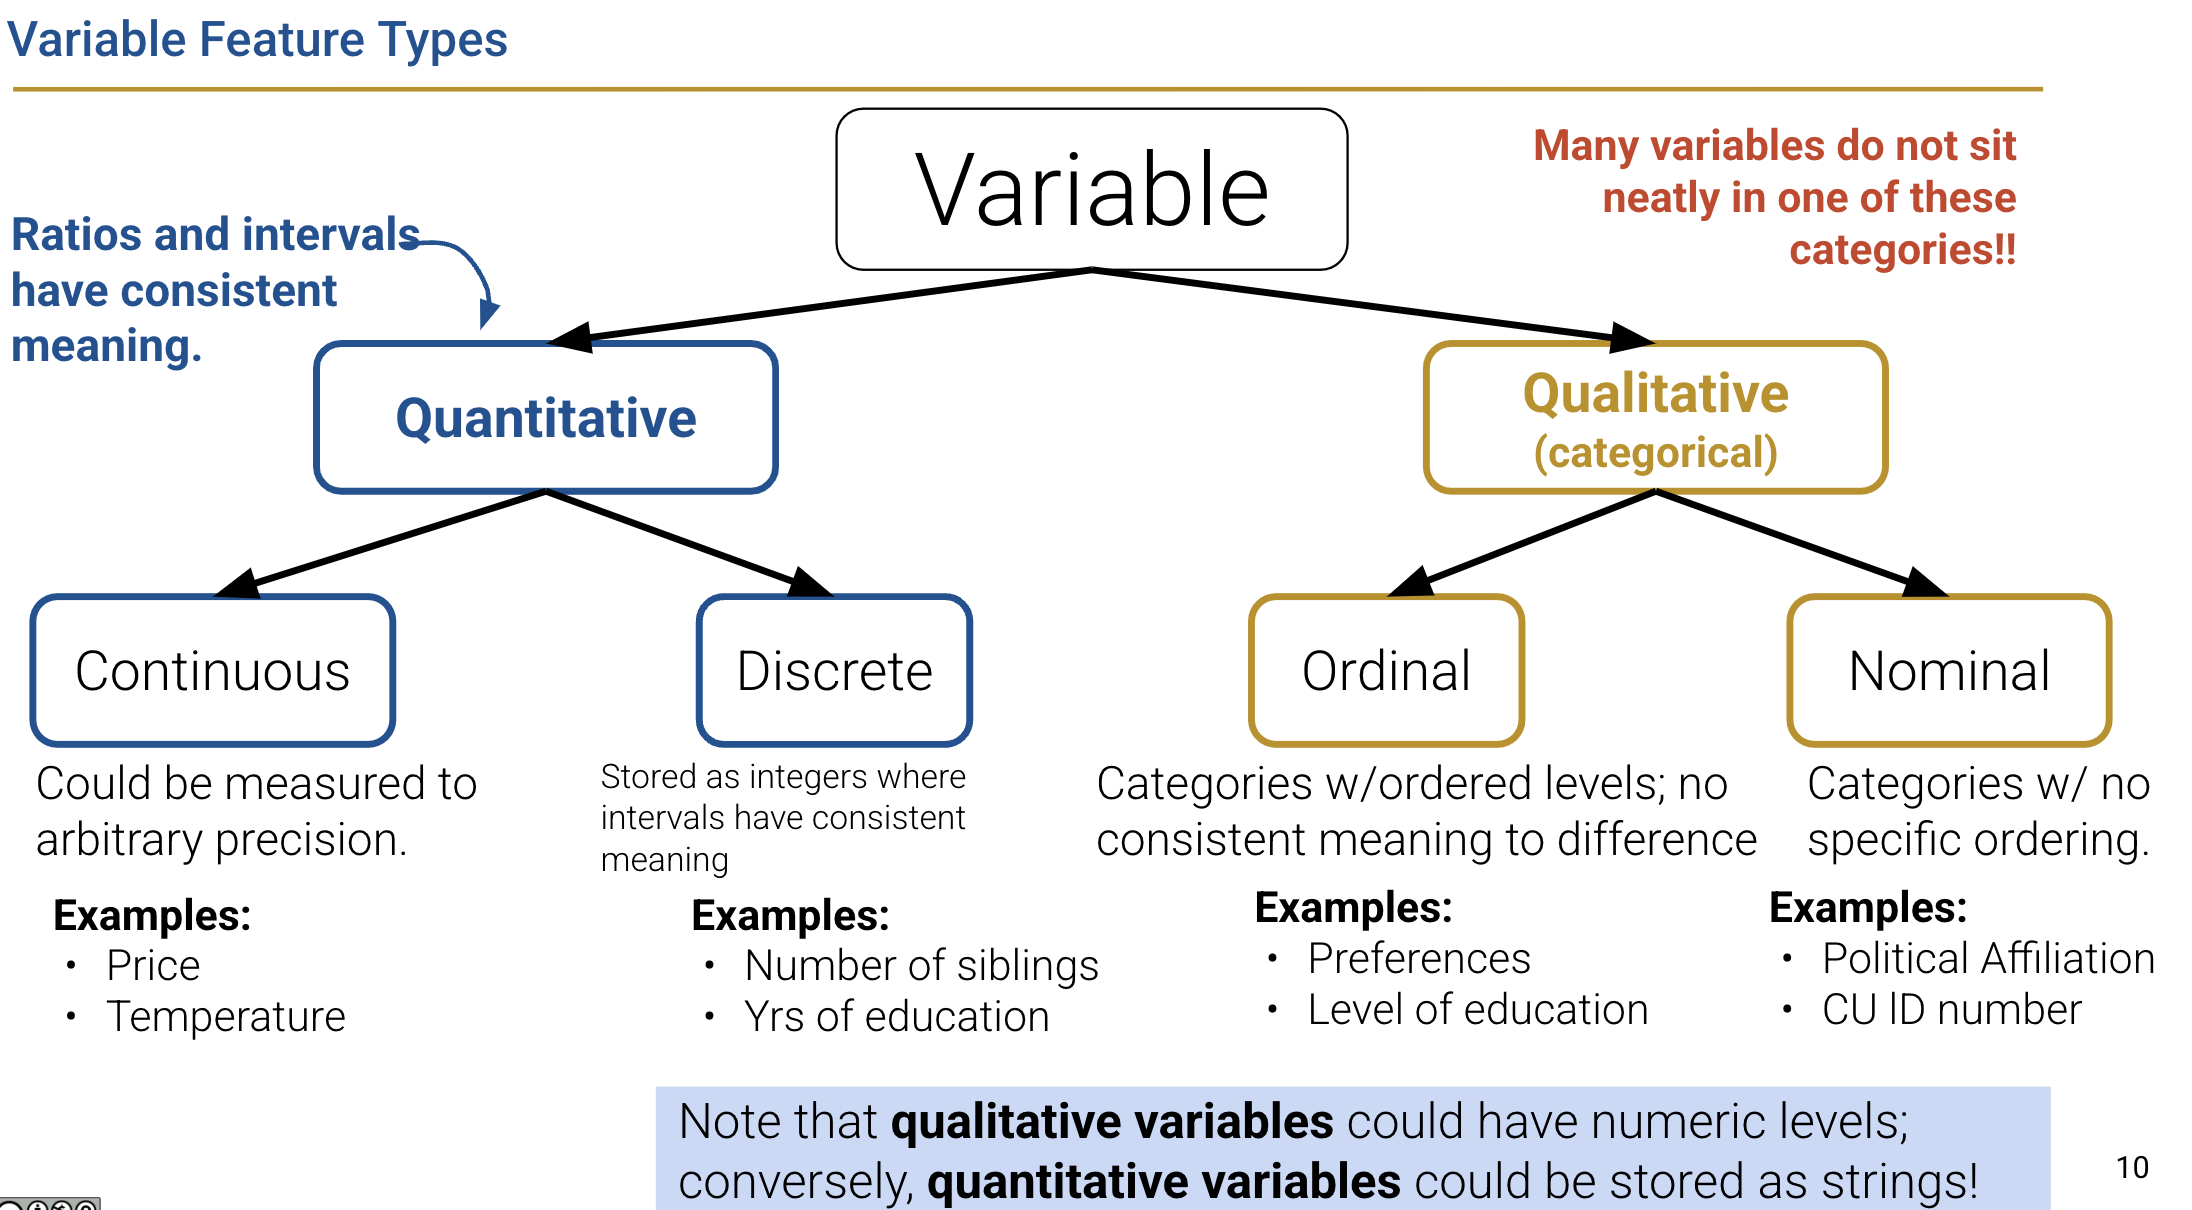


Fill in the table below tithe Feature Type


|Column|Description|Feature Type|
| --- | --- | ---- |
|Year| Year of the election |  |
|Candidate| Candidate who ran|  |
|Party | Party of candidate|    |
|Popular vote | Number of popular votes candidate received |   |
|Result | Whether the candidate won or lost the election |    |
|% | The percentage of popular votes the candidate received|    |

***
## EDA  - 2).  What is the Granularity of the data?

We use the term granularity to describe the level of measurement that uniquely identifies each record in the table.  

For example, does it represent a measurement from a unique person/event?  An aggregated measurement?   

Data that has a high level of granularity would have a large number of individual pieces of information, such as individual records or measurements. Data that has a low level of granularity would have a small number of individual pieces of information, such as summary data or aggregated data. Data granularity can affect how it is used and analyzed, and can impact the accuracy and usefulness of the results.


**Guiding Questions To Consider:**
 - What is the granularity of the dataset?
 - Do all records capture granularity at the same level?
   - Some data will include summaries (aka rollups) as records
 - If the data has a low level of granularity (i.e. has been aggregated in some way), how were the records aggregated?




In [19]:
elections.head()

Year               Candidate        Party  Popular vote Result          %
0  2024           Kamala Harris   Democratic      75019230   loss  48.336772
1  2024            Donald Trump   Republican      77303568    win  49.808629
2  2024              Jill Stein        Green        861155   loss   0.554864
3  2024  Robert F. Kennedy Jr.   Independent        756383   loss   0.487357
4  2024            Chase Oliver  Libertarian        650130   loss   0.418895

**Practice:  Based on these 5 rows, what does the granularity of the dataset appear to be?**

To explore this further, we need to select just the columns that uniquely identify each record:

**Practice: Use value_counts()to determine if the combination of Year and Party uniquely identifies each record**

In [ ]:
...

**What do you observe?  What does this tell you about the granularity**?

**Practice**:  What is the granularity?  Justify your answer with code


In [ ]:
...

Fun facts:

https://ballotpedia.org/Presidential_candidates,_2024

https://en.wikipedia.org/wiki/1824_United_States_presidential_election

https://en.wikipedia.org/wiki/1836_United_States_presidential_election

### Summary:  Why do we care about granularity?

Understanding the shape and granularity of a table gives us insight into what a row in a data table represents. This helps us determine whether the granularity is mixed, aggregation is needed, or weights are required. 

After looking at the granularity of your dataset, you should have answers to the following questions:
 - What does a record represent? Clarity on this will help you correctly carry out a data analysis and state your findings.

 - Do all records in a table capture granularity at the same level? Sometimes a table contains additional summary rows that have a different granularity, and you want to use only those rows that are at the right level of detail.
 - If the data are aggregated, how was the aggregation performed? Summing and averaging are common types of aggregation. With averaged data, the variability in the measurements is typically reduced and relationships often appear stronger.
 - What kinds of aggregations might you perform on the data? Aggregations might be useful or necessary to combine one data table with another.

Knowing your table’s granularity is a first step to cleaning your data, and it informs you of how to analyze the data. 

***
## EDA 3-5:  Scope, Temporality and Faithfulness


### SCOPE - What is the scope of the data?  (how (in)complete is the data?)

Scope includes considering the target population we want to study, how to access information about that population, and what your given datasets are actually measuring.

**Guiding Questions to Consider**
 - Does the data cover the target population?  
 - We will need to filter the data before using it? (Is it too expansive)?
 - Do we need to gather additional data before proceeding?
 

### Temporality -- how is the data situated in time?

**Guiding Questions To Consider**:

 - When was the data collected/last updated?
 - What is the meaning of any time and date fields? 
    - For our particular dataset, see the explanation of an MLB season:  https://www.fubo.tv/news/how-to-watch/how-long-is-the-mlb-season/
 - Are there strange date null values (e.g. January 1st 1970, January 1st 1900…?, etc)
 - Is there periodicity? Diurnal (24-hr), Monthly or Yearly patterns? 


### EDA -Faithfulness -- how well does the data capture “reality”?

**Guiding Questions To Consider**:

 - Does the data contain unrealistic or “incorrect” values?
 - Is there any missing data?
 - Does my data violate obvious dependencies?
 - Are there obvious signs of data falsification?

**Practice: Using the applicable utility function(s), determine how many unique years of election data we have in this dataset, and when it begins and ends.**

In [ ]:
...

**Practice:  Is there any  missing or unexpected data values?  Explain**